In [63]:
import numpy as np
import pandas as pd
import matplotlib.cm as cn
import matplotlib.pyplot as plt

# Importing data
data_train = pd.read_csv("train.csv")
#finding the shape
data_train.shape

(14999, 9)

In [64]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [65]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6, 'G':7, 'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [66]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [67]:
data_train=data_train[data_train.views != 'F']
data_train=data_train[data_train.likes != 'F']
data_train=data_train[data_train.dislikes != 'F']
data_train=data_train[data_train.comment != 'F']

data_train.head()

# Convert values to integers for views, likes, comments, dislikes and
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

column_vidid=data_train['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [68]:
# Convert Time_in_sec for duration
import datetime
import time
import pandas as pd

def checki(x):
    y=x[2:]
    h=''
    m=''
    s=''
    mm=''
    P=['H', 'M', 'S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h=mm
                mm=''
            elif(i=="M"):
                m=mm
                mm=''
    if(h==''):
        h='00'
    if(m==''):
        m='00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
        
                
                 
            
train=pd.read_csv("train.csv")
mp = pd. read_csv("train.csv") ["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,420,6
1,2741,2,1707,56,2,6,2185,540,4
2,8138,1,2023,25,0,2,2094,120,3
3,9005,6,620860,777,161,153,2119,240,8
4,122,1,666,1,0,0,2091,0,4


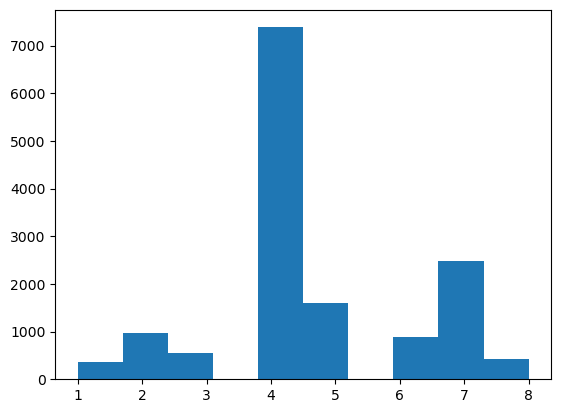

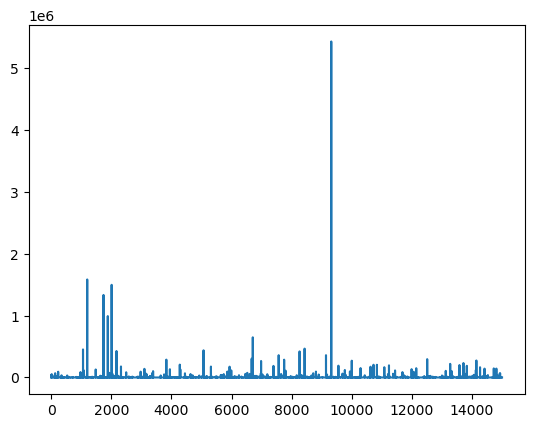

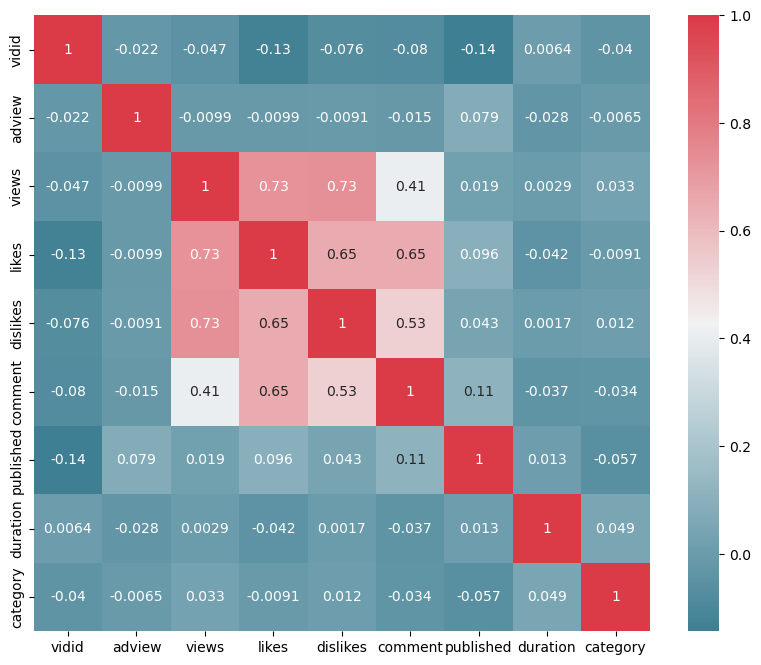

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualization
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

data_train = data_train[data_train["adview"] < 200000]

f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)

plt.show()


In [70]:
#splitting the data
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,420,6
1,1707,56,2,6,2185,540,4
2,2023,25,0,2,2094,120,3
3,620860,777,161,153,2119,240,8
4,666,1,0,0,2091,0,4


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11688, 7)

In [72]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.17369325363788063

In [73]:
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn.svm import SVR

def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# Convert y_train and y_test to 1-dimensional NumPy arrays
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

# Linear Regression
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test, y_test, linear_regression)

# Support Vector Regressor
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, y_train)
print_error(X_test, y_test, supportvector_regressor)


Mean Absolute Error: 1638.8610051016046
Mean Squared Error: 67307601.97653732
Root Mean Squared Error: 8204.121036195
Mean Absolute Error: 916.6565552095075
Mean Squared Error: 68656267.86441168
Root Mean Squared Error: 8285.907787588014


In [74]:
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, Input

def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# Decision Tree Regressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test, y_test, decision_tree)

# Random Forest Regressor
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train, y_train)
print_error(X_test, y_test, random_forest)

# Keras Neural Network
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1)) 

# Output layer
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
print_error(X_test, y_test, model)



Mean Absolute Error: 1886.0574948665299
Mean Squared Error: 134143595.51129363
Root Mean Squared Error: 11582.037623462187
Mean Absolute Error: 1828.728165131089
Mean Squared Error: 68341089.2028906
Root Mean Squared Error: 8266.866952049646
Epoch 1/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 68073512.0000
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 57894864.0000
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 54823060.0000
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 69328224.0000
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 66113488.0000
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 52948820.0000
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 53607636.0000
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 62655324.0000
Epoch 9/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 53082344.0000
Epoch 10/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 70100640.0000
92/92 ━━━━━━━━━━━

In [75]:
import joblib
from keras.models import Sequential

# Saving Scikit-learn models
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.keras") 
